In [3]:
import pickle as cPickle
actual_ratios = cPickle.load(open("/Users/khandekara2/Documents/methylationProject/03_results/actual_ratios.pickle", "rb"))
cancer_overlaps = cPickle.load(open("/Users/khandekara2/Documents/methylationProject/03_results/cancer_overlaps.pickle", "rb"))
WGBS_avgBeta = cPickle.load(open("/Users/khandekara2/Documents/methylationProject/03_results/WGBS_avgBeta.pickle", "rb"))

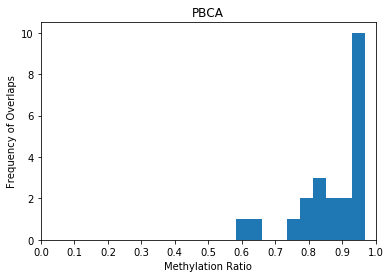

In [6]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
values = []
for location in cancer_overlaps['PBCA'][0]:
    values.append(WGBS_avgBeta['PBCA'][location])
plt.hist(values, bins=10)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Methylation Ratio')
plt.ylabel('Frequency of Overlaps')
plt.title('PBCA')

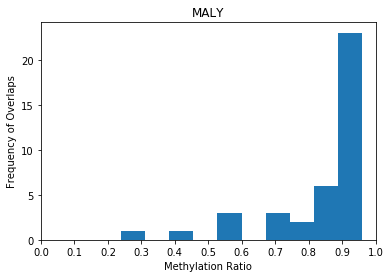

In [7]:
values = []
for location in cancer_overlaps['MALY'][0]:
    values.append(WGBS_avgBeta['MALY'][location])
plt.hist(values, bins=10)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Methylation Ratio')
plt.ylabel('Frequency of Overlaps')
plt.title('MALY')

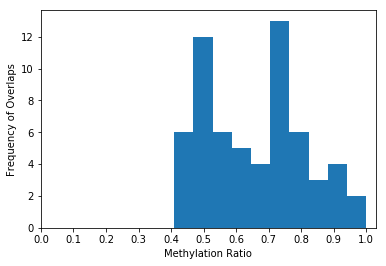

In [8]:
plt.hist(actual_ratios, bins=10)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Methylation Ratio')
plt.ylabel('Frequency of Overlaps')
# plt.title('MALY')

In [9]:
import collections
counter=collections.Counter(cancer_overlaps['MALY'][0])
print(counter)

Counter({('chr18', '72999671'): 1, ('chr1', '16558662'): 1, ('chr19', '11144146'): 1, ('chr19', '1044627'): 1, ('chr20', '48558133'): 1, ('chr20', '31629805'): 1, ('chr19', '47342810'): 1, ('chr1', '204957878'): 1, ('chr4', '187078815'): 1, ('chr11', '47367848'): 1, ('chr17', '7577548'): 1, ('chr16', '2230622'): 1, ('chr19', '11134251'): 1, ('chr12', '75601469'): 1, ('chr16', '4312619'): 1, ('chr16', '84005762'): 1, ('chr6', '32552026'): 1, ('chr2', '9520891'): 1, ('chr17', '15217426'): 1, ('chr9', '118950239'): 1, ('chr15', '45389858'): 1, ('chr1', '173915675'): 1, ('chr22', '23524069'): 1, ('chr19', '38993211'): 1, ('chr19', '11141492'): 1, ('chr19', '35551259'): 1, ('chr16', '1035073'): 1, ('chr12', '49420213'): 1, ('chr4', '125593272'): 1, ('chr9', '140040308'): 1, ('chr22', '50316906'): 1, ('chr7', '121773699'): 1, ('chr19', '47951334'): 1, ('chr11', '121476197'): 1, ('chr17', '9559767'): 1, ('chr17', '7577538'): 1, ('chr9', '100857248'): 1, ('chr22', '32625220'): 1, ('chr11', '66

In [10]:
counter=collections.Counter(cancer_overlaps['PBCA'][0])
print(counter)

Counter({('chr10', '116621020'): 1, ('chr19', '17741004'): 1, ('chr4', '122825611'): 1, ('chr3', '53785873'): 1, ('chr21', '34922544'): 1, ('chr5', '129243980'): 1, ('chr7', '129944388'): 1, ('chr18', '48241573'): 1, ('chr17', '63049639'): 1, ('chr22', '19504062'): 1, ('chr14', '23243597'): 1, ('chr19', '11141426'): 1, ('chr2', '75109275'): 1, ('chr13', '28608087'): 1, ('chr22', '22153338'): 1, ('chr19', '6156561'): 1, ('chr6', '133777748'): 1, ('chr19', '4543726'): 1, ('chr19', '51628589'): 1, ('chr7', '143088717'): 1, ('chr16', '52553376'): 1, ('chr17', '15234895'): 1})


In [17]:
print len(actual_ratios)

61


In [15]:
actual_ratios_no_threshold = cPickle.load(open("/Users/khandekara2/Documents/methylationProject/03_results/actual_ratios_no_threshold.pickle", "rb"))

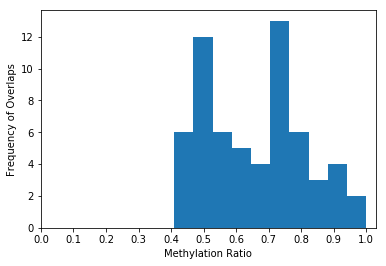

In [16]:

plt.hist(actual_ratios_no_threshold, bins=10)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Methylation Ratio')
plt.ylabel('Frequency of Overlaps')

In [26]:
import pandas as pd 
df = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/CLLE_prevBase.tsv', sep = '\t')



In [21]:
df.head()

,chromosome,start,stop,id,methylation_ratio,prev_base
0,chr1,100127910,100127911,X932-01-5D,0.913043,G
1,chr1,100127910,100127911,X932-01-6D,0.769231,G
2,chr1,100133241,100133242,003-0005-10TD,0.888889,G
3,chr1,100133241,100133242,016-0040-02TD,0.916667,G
4,chr1,100133241,100133242,X932-01-4D,0.954545,G


In [27]:
groupby = df['methylation_ratio'].groupby(df['prev_base'].str.upper())
df = groupby.agg([np.mean])
df.reset_index(inplace=True)

In [28]:
df.head()

,prev_base,mean
0,A,0.708971
1,C,0.682562
2,G,0.652690
3,T,0.721370


In [33]:
df2 = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/PBCA_prevBase.tsv', sep = '\t')

In [34]:
groupby2 = df2['methylation_ratio'].groupby(df2['prev_base'].str.upper())
df2 = groupby2.agg([np.mean])
df2.reset_index(inplace=True)

In [35]:
df2

,prev_base,mean
0,A,0.674411
1,C,0.608820
2,G,0.597238
3,T,0.679967


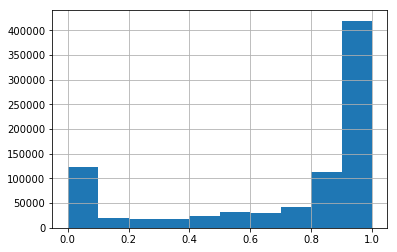

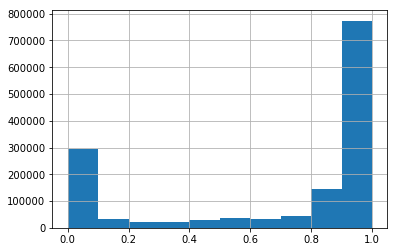

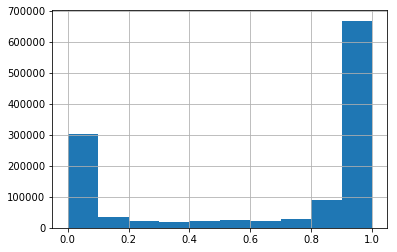

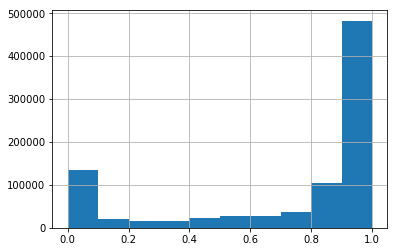

In [38]:
import matplotlib.pyplot as plt

for i, group in groupby:
    plt.figure()
    group.hist()

In [41]:
#create 4 separate dataframes for each prev_base and plot boxplot
clle = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/CLLE_prevBase.tsv', sep = '\t')
pbca = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/PBCA_prevBase.tsv', sep = '\t')
A = pbca[pbca['prev_base'].str.upper() == "A"]
C = pbca[pbca['prev_base'].str.upper() == "C"]
T = pbca[pbca['prev_base'].str.upper() == "T"]
G = pbca[pbca['prev_base'].str.upper() == "G"]

In [42]:
print A.shape
print C.shape
print T.shape
print G.shape

(8196436, 6)
(14075707, 6)
(8700837, 6)
(12017916, 6)


In [43]:
print pbca.shape

(42990896, 6)


In [46]:
pbca['prev_base'] = pbca['prev_base'].str.upper()

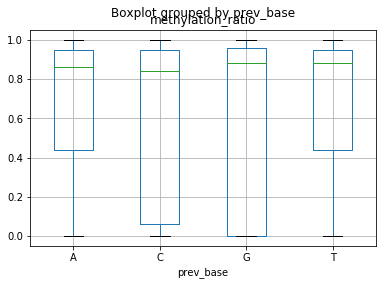

In [47]:
#plot boxplots
pbca.boxplot(by='prev_base', column='methylation_ratio')

In [48]:
A = clle[clle['prev_base'].str.upper() == "A"]
C = clle[clle['prev_base'].str.upper() == "C"]
T = clle[clle['prev_base'].str.upper() == "T"]
G = clle[clle['prev_base'].str.upper() == "G"]

In [49]:
print A.shape
print C.shape
print T.shape
print G.shape

(842979, 6)
(1435387, 6)
(888020, 6)
(1230304, 6)


In [53]:
clle['prev_base'] = clle['prev_base'].str.upper()

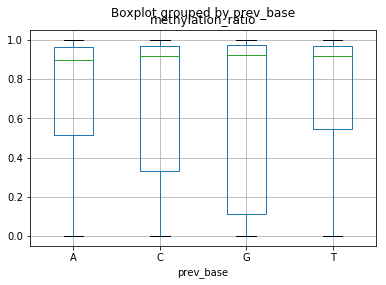

In [54]:
clle.boxplot(by='prev_base', column='methylation_ratio')

In [56]:

grouped = pbca['methylation_ratio'].groupby(pbca['id'])
grouped_df = grouped.agg([np.mean, np.std])
grouped_df.reset_index(inplace=True)

In [57]:
grouped_df

,id,mean,std
0,ICGC_A1,0.598050,0.412314
1,ICGC_A2,0.605588,0.406952
2,ICGC_A3,0.617134,0.408684
3,ICGC_A4,0.612687,0.406090
4,ICGC_F1,0.639435,0.399321
5,ICGC_F2,0.643183,0.396007
6,ICGC_F3,0.626112,0.396456
7,ICGC_F4,0.651211,0.399061
8,ICGC_MB1,0.639811,0.396933
9,ICGC_MB107,0.661684,0.398667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x24d2b1610>]], dtype=object)

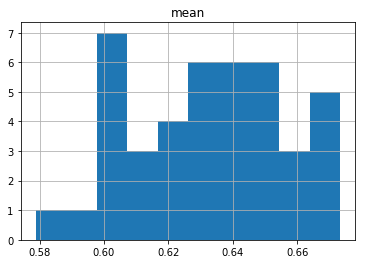

In [58]:
grouped_df.hist(column='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1f8c73ed0>]], dtype=object)

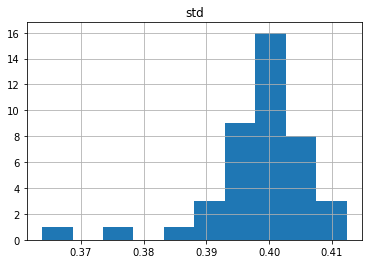

In [59]:
grouped_df.hist(column='std')

In [4]:
import numpy as np
import pandas as pd
pbca = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/PBCA_prevBase.tsv', sep = '\t')
methylated = pbca[pbca['methylation_ratio'] > 0]
grouped = methylated['methylation_ratio'].groupby(methylated['id'])
grouped_df = grouped.agg([np.mean, np.std])
grouped_df.reset_index(inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111dda198>]], dtype=object)

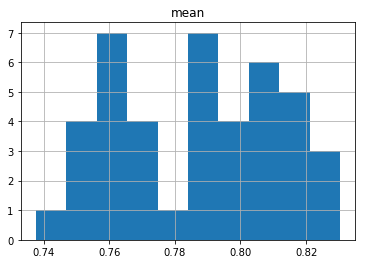

In [6]:
%matplotlib inline
grouped_df.hist(column='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111f23710>]], dtype=object)

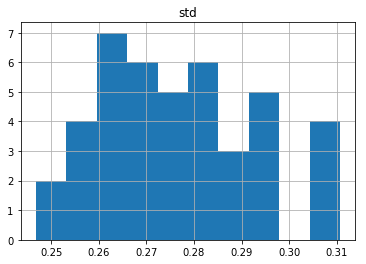

In [7]:
grouped_df.hist(column='std')

In [10]:
grouped_df.to_csv('sample_means.csv')